# Modéle CNN pour classification des fruits 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### DataSet - step 1

In [3]:
img_height, img_width = 32, 32
batch_size = 20 
train_dataset = tf.keras.utils.image_dataset_from_directory("../Data/fruits/train", image_size = (img_height, img_width), batch_size = batch_size)
validation_dataset = tf.keras.utils.image_dataset_from_directory("../Data/fruits/validation/", image_size = (img_height, img_width), batch_size = batch_size)
test_dataset = tf.keras.utils.image_dataset_from_directory("../Data/fruits/test/", image_size = (img_height, img_width), batch_size = batch_size) 

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


### Data visualization - step 2 

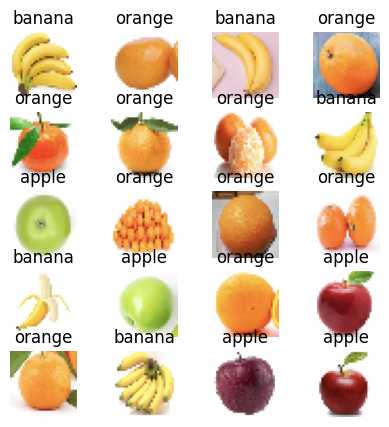

In [4]:
class_names = train_dataset.class_names
plt.figure(figsize=(5,5))
for image, label in train_dataset.take(1):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")
plt.show()

### création du modèle - step 3

In [5]:
modelCNN = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, (3, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, (3, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = "softmax")
    ]
)

In [6]:
modelCNN.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [7]:
modelCNN.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5848 - loss: 0.8535 - val_accuracy: 0.8182 - val_loss: 0.5364
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8283 - loss: 0.4030 - val_accuracy: 0.8788 - val_loss: 0.2985
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9065 - loss: 0.2402 - val_accuracy: 0.8939 - val_loss: 0.2932
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9500 - loss: 0.1571 - val_accuracy: 0.9242 - val_loss: 0.2658
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9630 - loss: 0.1176 - val_accuracy: 0.9242 - val_loss: 0.1729
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9696 - loss: 0.1076 - val_accuracy: 0.9242 - val_loss: 0.2360
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9739 - loss: 0.0863 - val_accuracy: 0.9242 - val_loss: 0.1807
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9394 - v

In [8]:
modelCNN.fit(test_dataset, verbose=2)

7/7 - 0s - 38ms/step - accuracy: 0.9615 - loss: 0.1431


### Test - step 4

In [9]:
modelCNN.evaluate(test_dataset, verbose=2)

7/7 - 0s - 22ms/step - accuracy: 0.9385 - loss: 0.1364


[0.1364487260580063, 0.9384615421295166]

In [11]:
for images, labels in test_dataset.take(1):
    predictions = modelCNN.predict(images)
    predicted_classes = np.argmax(predictions, axis = 1)
    for i in range(len(images)):
        print(f"Vrai : {class_names[labels[i]]}, Prédit : {class_names[labels[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Vrai : apple, Prédit : apple
Vrai : banana, Prédit : banana
Vrai : apple, Prédit : apple
Vrai : orange, Prédit : orange
Vrai : orange, Prédit : orange
Vrai : apple, Prédit : apple
Vrai : orange, Prédit : orange
Vrai : banana, Prédit : banana
Vrai : apple, Prédit : apple
Vrai : banana, Prédit : banana
Vrai : apple, Prédit : apple
Vrai : apple, Prédit : apple
Vrai : banana, Prédit : banana
Vrai : apple, Prédit : apple
Vrai : banana, Prédit : banana
Vrai : apple, Prédit : apple
Vrai : banana, Prédit : banana
Vrai : apple, Prédit : apple
Vrai : orange, Prédit : orange
Vrai : orange, Prédit : orange
